# Data Wrangling 

### Data wrangling is the process of cleaning, transforming, and organizing data so that it can be used for analysis and visualization. 


### It is an important step in the data analysis process because raw data is often incomplete, inconsistent, and in an unstructured format, which can make it difficult to work with. 


### • Data wrangling helps to make the data more consistent, accurate, and useful for analysis and decision making.

# Steps of Data Wrangling 

In [ ]:
# import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1.Gather Data 

In [ ]:
df = sns.load_dataset("titanic")
df.head()

# 2. Access the Data (EDA)

In [ ]:
df.head() # view first 5 rows
df.describe() # summary statistics
df.info() # data types and non-null counts
df.isnull().sum() / len(df) * 100 # percentage of missing values
df.shape # dimensions (rows and columns of table ) of the dataset

# 3. Cleaning the Data 

## 1.Deal with missing values 

In [ ]:
df['age'] = df['age'].fillna(value=df['age'].mean()) # fill missing values in 'age' with mean

In [ ]:
df.embark_town = df.embark_town.fillna(value=df.embark_town.mode()[0])

In [ ]:
df.embarked = df.embarked.fillna(value=df.embarked.mode()[0]) # fill missing values in 'embarked' with mode

## Remove Null Column 

In [ ]:
df.drop(columns='deck',inplace=True) # drop deck column from dataset 

## 2.Correcting Errors in Data 
# 1. Removal of OUTLIERS

## 1. Visualization method 

In [ ]:
sns.boxplot(data=df,x='sex',y='age',hue='sex')

## 2. IQR Method 

In [ ]:
Q1 = df['age'].quantile(0.25) # 25th percentile
Q3 = df['age'].quantile(0.75) # 75th percentile
IQR = Q3 - Q1 # interquartile range
print(IQR)
lower_bound = Q1 - 1.5 * IQR # lower bound
upper_bound = Q3 + 1.5 * IQR # upper bound
df = df[(df['age']>lower_bound)&(df['age']<upper_bound)] # remove outliers

In [ ]:
Q1 = df['fare'].quantile(0.25) # 25th percentile
Q3 = df['fare'].quantile(0.75) # 75th percentile
IQR = Q3 - Q1 # interquartile range
print(IQR)
lower_bound = Q1 - 1.5 * IQR # lower bound
upper_bound = Q3 + 1.5 * IQR # upper bound
df = df[(df['fare']>lower_bound)&(df['fare']<upper_bound)] # remove outliers

In [ ]:
df.shape

In [ ]:
sns.histplot(data=df,x='age',kde=True) # histogram of age with kernel density estimate

## 3. Zscore Method 

In [ ]:
zscore = np.abs(stats.zscore(df['age'])) # calculate z-scores
threshold = 3 # set threshold for z-score
df = df[zscore < threshold] # remove outliers based on z-score
df.shape # check dimensions after removing outliers

# 3. Find and Drop Duplicates

In [ ]:
df.duplicated().sum() # check for duplicates

In [ ]:
df1_dup_count = df.duplicated().value_counts() # check frequency of duplicates
plt.bar(df1_dup_count.index, df1_dup_count.values) # bar plot of duplicates
plt.xlabel('Duplicates')
plt.ylabel('Count')

In [ ]:
df.drop_duplicates(inplace=True) # remove duplicate rows
df.shape # check dimensions after removing duplicates

# 4. Transformation (Data Normalization)

### To bring data at one scale 

## 1.MinMaxScaler Technique

In [240]:
# 1.Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 2.data
df
# 3.select column to normalize
columns_to_normalize = ['age', 'fare']
#4.Create scaler function/tool means scaler object
scaler = MinMaxScaler()
#5.Fit and Transform the data on scaler object
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
#6.check data after scaling(normalization)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.470588,0,0,0.211798,S,Second,man,True,Southampton,no,True
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True


In [ ]:
# Log transformation function of numpy library
df['age'] =  np.log(df['age'])
df['fare'] =  np.log(df['fare'])
sns.boxplot(data=df,x='sex',y='age',hue='sex')

In [ ]:
df.describe() # summary statistics after normalization

## 2.StandardScaler Technique

In [ ]:
# 1.Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
# 2.data
df
# 3.select column to normalize
columns_to_normalize = ['age', 'fare']
#4.Create scaler function/tool means scaler object
scaler = StandardScaler()
#5.Fit and Transform the data on scaler object
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
#6.check data after scaling(normalization)
df

## 3.Log Transformation Technique
### 1.`np.log()` for data whose values are far to zero 
### 2.`np.log1p()` for data whose values are near to zero 


In [ ]:
import numpy as np
dfnew = sns.load_dataset('titanic')

dfnew['age'] = dfnew['age'].fillna(value=dfnew['age'].median())
dfnew['fare'] = dfnew['fare'].fillna(value=dfnew['fare'].median())

dfnew['age'] =  np.log(dfnew['age'])
dfnew['fare'] =  np.log(dfnew['fare'])

dfnew.head()

In [ ]:
# boxplot to check outlier after log transformation
sns.boxplot(data=dfnew,x='sex',y='fare')

In [ ]:
sns.histplot(dfnew['age'])

# 5. Organizing The Data 
> This step is For own or peoples understanding 

In [ ]:
# make (family size)column by combining two columns of dataframe

## 1.Create Columns 

In [243]:
df['family_size'] = df['sibsp'] + df['parch']

#### Histplot will tell benefits of new column created 

In [ ]:
sns.histplot(data=df, x='family_size',hue='sex',alpha=0.9) # histogram of family size with kernel density estimate

In [ ]:
sns.swarmplot(data=df,x='sex',y='family_size',hue='sex')

In [ ]:
sns.swarmplot(data=df,x='sex',y='age',hue='family_size')

## 2.Rename Columns to get hidden understanding 

In [244]:
df = df.rename(columns={'survived':'survival'})

## 3.A pivot table is a data summarization tool that:

### 1.Aggregates (groups, calculates, summarizes) data from a larger table

### 2.Rearranges data by moving variables between rows, columns, and values



In [248]:
table= pd.pivot_table(df,values='fare',index='pclass',columns='survival',aggfunc='sum')
table

survival,0,1
pclass,,
1,22.522149,35.036780
2,23.120956,25.612776
3,70.174074,24.655474


# 4. Check Relationship b/w data points 

<Axes: xlabel='fare', ylabel='age'>

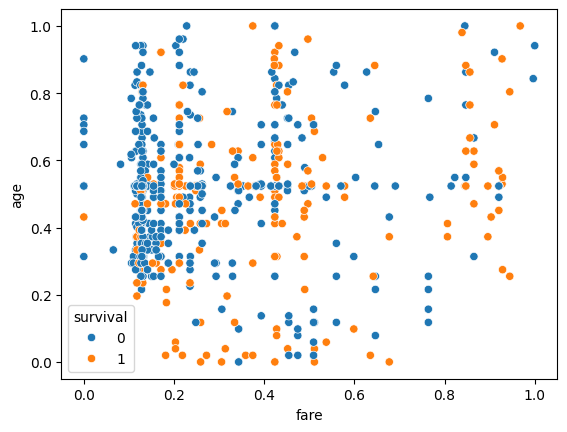

In [245]:
sns.scatterplot(data=df,x='fare',y='age',hue='survival',alpha=1) # scatter plot of fare vs age with hue for survival

In [241]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True


## Line Plot for Time-Series Analysis 

<Axes: xlabel='family_size', ylabel='age'>

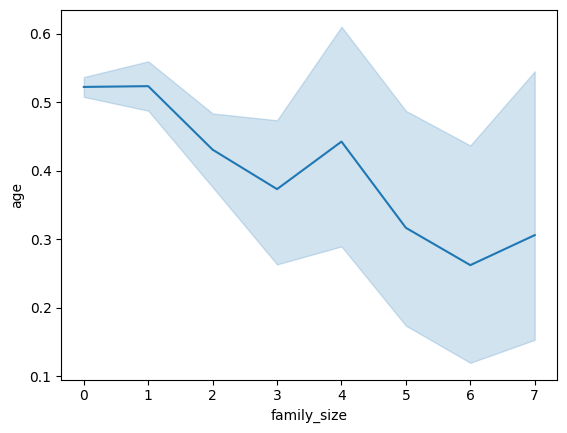

In [246]:

sns.lineplot(data=df,x='family_size',y='age')

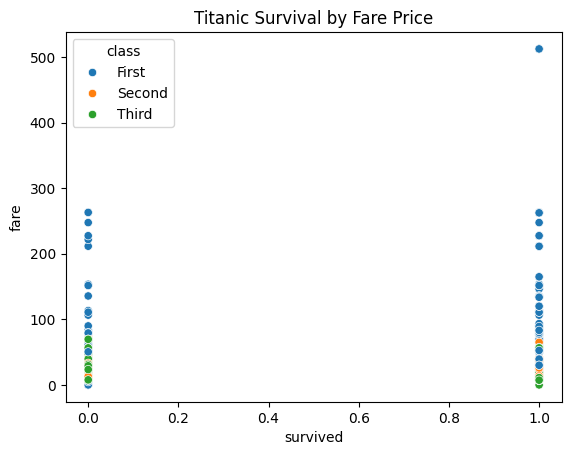

In [247]:
import seaborn as sns  
titanic = sns.load_dataset('titanic')  

# Create the scatter plot  
sns.scatterplot(  
    x='survived',   
    y='fare',   
    data=titanic,  
    hue='class'  # Color-code by passenger class  
)  
plt.title("Titanic Survival by Fare Price")  
plt.show()  